<a href="https://colab.research.google.com/github/SotaYoshida/Lecture_DataScience/blob/main/notebooks/Python_chapter_Bayesian_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ベイズ線形回帰

## 線形回帰 (多項式回帰の例)


線形回帰モデル:  
$y({\bf x},{\bf w})= \sum^{M-1}_{j=0} w_j \phi_j({\bf x}) = {\bf w}^T\boldsymbol{\phi}({\bf x})$を考える。  

ここで$\boldsymbol{\phi}$は基底関数のベクトルで、
$p$次の多項式回帰の場合は$\boldsymbol{\phi}=(1, x, x^2, \ldots, x^p)$といった感じ。

実際この場合にベクトルの内積を書き下すと
${\bf w}^T\boldsymbol{\phi}=w_0 + w_1x+ w_2x^2+ \cdots + w_{p}x^p$となり、
$p$次多項式になっている。


さて目標変数$t$が、決定論的な関数$y({\bf x},{\bf w})$と平均0,精度$\beta\equiv 1/\sigma^2$の誤差$\epsilon$の和:  $t=y({\bf x},{\bf w})+\epsilon$で与えられていると仮定する。  

つまり、$t$の確率分布が
$p(t|{\bf x},{\bf w},\beta) = \mathcal{N}(t|y({\bf x},{\bf w}),\beta^{-1})$で与えられるとする。


入力$\boldsymbol{\mathrm{X}}=\{{\bf x_1},{\bf x_2},\ldots, {\bf x_N}\}$と、
対応する目標値を$\boldsymbol{\mathrm{t}}=\{t_1,t_2,\ldots, t_N\}$と表すことにしておこう。

これらのデータ点が上の分布$p(t|{\bf x},{\bf w},\beta)$から独立に生成されたと仮定すると、  
データの目標変数についての確率分布は$p(\boldsymbol{\mathrm{t}}|\boldsymbol{\mathrm{X}},{\bf w},\beta) = \prod^N_{n=1} \mathcal{N}(t_n|{\bf w}^T \boldsymbol{\phi}({\bf x_n}) ,\beta^{-1})$で与えられる。  
(以下では、確率分布の条件部分にある${\bf x}$などを適宜省略する)

このとき、対数尤度は
$\ln p(\boldsymbol{\mathrm{t}}|{\bf w},\beta) = \sum^N_{n=1} \ln \mathcal{N}(t_n|{\bf w}^T\boldsymbol{\phi}({\bf x_n}) ,\beta^{-1}) = \frac{N}{2}\ln\beta - \frac{N}{2}\ln(2\pi) -\beta E_D({\bf w})$となる。

なお$E_D$は二乗和誤差関数:
$E_D({\bf w}) \equiv \frac{1}{2}\sum^N_{n=1} \{ t_n- {\bf w}^T \boldsymbol{\phi}({\bf x_n})  \}$
である。

対数尤度の勾配を書き下して、最尤推定を考えるとすると$\nabla \ln p(\boldsymbol{\mathrm{t}}|{\bf w},\beta) = \beta \sum^N_{n=1} \{ t_n -{\bf w}^T \boldsymbol{\phi}({\bf x_n}) \} \boldsymbol{\phi}({\bf x_n})^T $の根が必要。

つまり$0= \sum^N_{n=1} t_n \boldsymbol{\phi}({\bf x_n})^T - {\bf w}^T(\sum^N_{n=1}\boldsymbol{\phi}({\bf x_n})\boldsymbol{\phi}({\bf x_n})^T)$をときたい。

上の式を変形すると${\bf w} = ( \boldsymbol{\Phi}^T\boldsymbol{\Phi}  )^{-1} \boldsymbol{\Phi}^T \boldsymbol{\mathrm{t}}$が根であることがわかる。  
つまり、最尤推定を与えるパラメータ${\bf w}_{ML}$は、計画行列$\boldsymbol{\Phi}$を用いて閉じた形で与えられる。

なお、計画行列の要素は
$\boldsymbol{\Phi}_{nj} = \phi_j({\bf x_n})$で与えられる。



---

次の１次元擬似データの回帰を考えてみる。

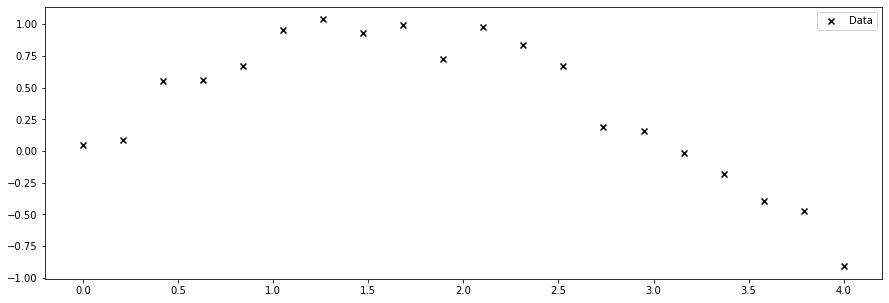

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

## データ点の生成
np.random.seed(1234)
x = np.linspace(-2.0,6.0,1000)
beta = 1.e+2
xt = np.linspace(0.0,4.0,20)
yt = np.sin(xt) + np.array([ np.random.normal(0.0,1.0/np.sqrt(beta)) for i in range(len(xt))])

fig = plt.figure(figsize = (15,5))
axs = [fig.add_subplot(111)]
axs[0].scatter(xt,yt,label="Data",color="k",marker="x")
axs[0].legend()
plt.show()
plt.close() 

これを,numpyモジュールの多項式fit関数と、上の計画行列によって3次式で回帰してみると...

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10


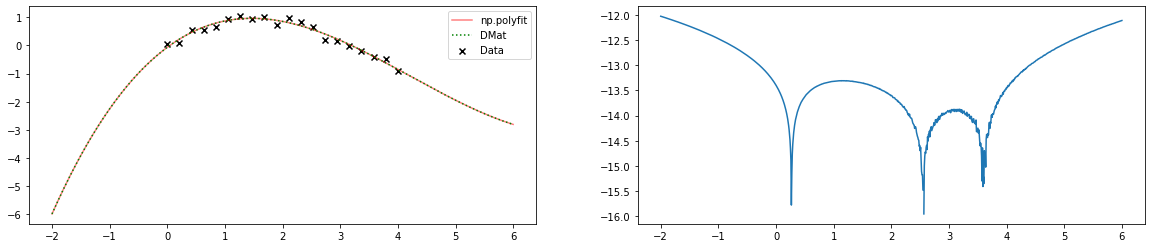

In [ ]:
N = len(xt)

##　多項式の次元を固定しておく
p=3

##numpyのfit
yp = np.poly1d(np.polyfit(xt, yt, p))(x) 

## 計画行列を用いる方法
def phi(x,p):
    return np.array([ x**i for i in range(p+1)])
Phi = np.zeros((N,p+1))
for i in range(N):
    xn = xt[i]
    tmp = phi(xn,p) 
    for j in range(p+1):
        Phi[i][j] = tmp[j]
S = np.linalg.inv(np.dot(Phi.T,Phi))
wML = np.dot(S,np.dot(Phi.T,yt))
yD = [ np.dot(wML,phi(xn,p)) for xn in x ]

#図のplot
fig = plt.figure(figsize = (20,4))
axs = [fig.add_subplot(121),fig.add_subplot(122)]
axs[0].scatter(xt,yt,label="Data",color="k",marker="x")
axs[0].plot(x,yp,label="np.polyfit",color="r",alpha=0.5)
axs[0].plot(x,yD,label="DMat",linestyle="dotted", color="g")
axs[0].legend()

axs[1].plot(x,np.log10(abs(yp-yD)))
plt.show()
plt.close() 

となり、ライブラリの出力と計画行列を用いた最尤推定の結果とが  
ピッタリ(ざっくり14桁程度)一致していることがわかる。

マニアックな注: np.polyfitもおそらく計画行列を用いて定義されているはず。  
numpyの中身を見てないので不正確かもしれませんが、  
僅かな答えの差は、逆行列計算に由来するものではないかと想像します。

### L2正則化項がある場合への拡張

二乗和誤差関数に、L2正則化項を入れた場合:
$\frac{1}{2}\sum^N_{n=1} \{ t_n- {\bf w}^T \boldsymbol{\phi}({\bf x_n})  \} + \frac{\lambda}{2} {\bf w}^T{\bf w}$
に拡張してみよう。

上と同様に勾配を計算すると、最尤推定を与えるパラメータ${\bf w}$は
${\bf w}_{ML,L2} = (\lambda I + \boldsymbol{\Phi}^T\boldsymbol{\Phi}  )^{-1} \boldsymbol{\Phi}^T \boldsymbol{\mathrm{t}}$  
(つまり計画行列に単位行列を足すだけ)となる。  

(対数尤度が$|w|^2$に比例することからほとんど自明だが)  
あとで示すように「L2正則化を課すこと」は、パラメータのベイズ的取り扱いにおいて  
「事前分布にガウス分布を仮定すること」と等価である。



## ベイズ線形回帰

次に、パラメータ${\bf w}$をベイズ的に取り扱う事を考える。

このノートでいう[ベイズ的]とはせいぜい「パラメータを点推定する立場より有限の幅をもつ確率分布としてパラメータを考える」という程度の意味である。  

パラメータ${\bf w}$が、平均$\boldsymbol{\mu}$,共分散$\boldsymbol{\Sigma}$で指定される多次元の正規分布に従うと仮定する: ${\bf w} \sim \mathcal{N}(\boldsymbol{\mu},\boldsymbol{\Sigma})$  

このとき、パラメータの事後分布は$p({\bf w}|\boldsymbol{\mathcal{t}}) = \mathcal{N}(\tilde{\boldsymbol{\mu}},\tilde{\boldsymbol{\Sigma}})$で与えられる。

ここで事後分布の平均および共分散は以下のとおりである:  
$\tilde{\boldsymbol{\Sigma}}^{-1} =\boldsymbol{\Sigma}^{-1}+\beta\boldsymbol{\Phi}^T \boldsymbol{\Phi},
\tilde{\boldsymbol{\mu}}= \tilde{\boldsymbol{\Sigma}} (\boldsymbol{\Sigma} \boldsymbol{\mu} + \beta \boldsymbol{\Phi}^T \boldsymbol{\mathcal{t}})$  

...

ここで簡単のため事前分布をさらに簡略化しよう。  
事前分布の平均$\boldsymbol{\mu}$が$0$(ベクトル)かつ、  
パラメータの事前分布の共分散が対角的(独立な分散をもつ)でなおかつ値が同じ,  
つまり、上の$\boldsymbol{\Sigma}=\alpha^{-1}I$とかける場合を考える。

このとき、事後分布の平均および共分散は以下のように簡略化される:  
$\tilde{\boldsymbol{\Sigma}}^{-1} =\alpha I +\beta\boldsymbol{\Phi}^T \boldsymbol{\Phi}$  
$\tilde{\boldsymbol{\mu}}=  \beta \tilde{\boldsymbol{\Sigma}} \boldsymbol{\Phi}^T \boldsymbol{\mathcal{t}}$

この条件のもとで対数事後確率(log posterior)は  
$\ln p({\bf w}|\boldsymbol{\mathrm{t}}) = -\frac{\beta}{2}\sum^N_{n=1} \{t_n - {\bf w}^T \phi(x_n) \}^2 -\frac{\alpha}{2} {\bf w}^T{\bf w} + $ (正規分布の係数からくるオマケの定数)となる。

したがって正規分布で与えられる事前分布のもとでパラメータ${\bf w}$の事後分布を最大化することは、  
L2正則化項がある場合の誤差関数の最小化と($\lambda=\beta/\alpha$とすれば)等価であることがわかる。



実用上は${\bf w}$の分布を考えたあと、それを予測値の分布として伝播させる必要がある。

一般に予測分布を評価する際は、サンプリング法などが必要になるが、"性質の良い"確率分布を用いる場合は、予測分布も閉じた形で書き下すことができる。  
実際、今の場合は予測分布も正規分布になる.


未知の点$x^*$での値を$t^*$と書くことにすると、

$p(t^*|\boldsymbol{\mathrm{t}},\alpha,\beta) =
\int p(t|{\bf w},\beta) p({\bf w}|\boldsymbol{\mathrm{t}},\alpha,\beta) d{\bf w} $

今の場合、ガウス分布の性質から、
予測分布は以下で与えられる:  
$p(t^*|{\bf x},\boldsymbol{\mathrm{t}},\alpha,\beta) = \mathcal{N}(t^*|\tilde{\boldsymbol{\mu}}^T\boldsymbol{\phi}({\bf x}),\sigma^2_N({\bf x}))$

ここで、予測分布の分散は$\sigma^2_N({\bf x})= \frac{1}{\beta}+\boldsymbol{\phi}({\bf x})^T \tilde{\boldsymbol{\Sigma}}\boldsymbol{\phi}({\bf x}) $



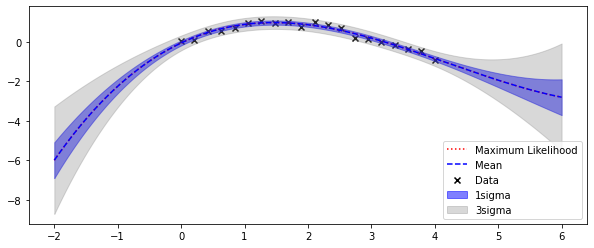

In [ ]:
## alpha(事前分布の精度=分散の逆数)は決め打ちとする
alpha = 1.e-5 #精度が小さい=分散が大きい=パラメータの事前知識が"弱い"

## wの事後分布の計算
I = np.diag([1.0 for i in range(p+1)])
Sigma = np.linalg.inv( alpha * I + beta * np.dot(Phi.T, Phi) )
mu = beta * np.dot(Sigma, np.dot(Phi.T,yt))

## 予測値(その分散)のリストを作成
y_BLR = []
for tx in x :
    tmp = phi(tx,p)
    mu_p = np.dot(mu,tmp)    
    term1 = 1.0/beta
    term2 =  np.dot(tmp,np.dot(Sigma,tmp))
    sigma_p = term1 + term2 
    #print("term1", term1, "term2", term2)
    y_BLR += [ [mu_p, sigma_p] ]
y_BLR = np.array(y_BLR).T

## plot
fig = plt.figure(figsize = (10,4))
axs = [fig.add_subplot(111)]
axs[0].scatter(xt,yt,label="Data",color="k",marker="x")
axs[0].plot(x,yD,label="Maximum Likelihood",linestyle="dotted", color="red")
axs[0].plot(x,y_BLR[0],label="Mean",linestyle="dashed", color="blue")
axs[0].fill_between(x,y_BLR[0]+np.sqrt(y_BLR[1]),y_BLR[0]-np.sqrt(y_BLR[1]),label="1sigma", color="blue",alpha=0.5)
axs[0].fill_between(x,y_BLR[0]+3*np.sqrt(y_BLR[1]),y_BLR[0]-3*np.sqrt(y_BLR[1]),label="3sigma", color="gray",alpha=0.3)
axs[0].legend()
plt.show()
plt.close() 

パラメータの広がりが予測に伝搬され、  
データが無いところで予測が不確かになっていることが見て取れる。


注) 上では、データの精度$\beta$(分散の逆数)や、パラメータ${\bf w}$の精度$\alpha$を既知とした。  
実際には、$\beta$そのものがわからなかったりする。



(編集予定)

## ブートストラップ法